# 时间序列

## 日期和时间数据类型及工具

In [1]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 7, 6, 9, 4, 12, 62288)

In [2]:
now.year, now.month, now.day

(2019, 7, 6)

In [3]:
# datetime以毫秒形式存储日期和时间
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [4]:
# datetime.timedelta(926, 56700)第一项是天数，第二项是不足一天的秒数
delta.days

926

In [5]:
from datetime import timedelta
start = datetime(2011, 1, 7)
# timedelta的单位是天
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [6]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [7]:
# 表10-1：datetime模块中的数据类型

### 字符串和datetime的相互转换

In [8]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [10]:
# 表10-2列出了全部的格式化编码
# datetime.strptime可以用这些格式化编码将字符串转换为日期
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
# 使用dateutil中的parser.parse方法解析常见日期格式
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
# 国际通用格式
# 传入dayfirst参数
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [16]:
idx = pd.to_datetime(datestrs + [None])
idx
# NaT是pandas中时间戳数据的NA值

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

## 时间序列基础

In [17]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.539983
2011-01-05    0.664475
2011-01-07   -0.673932
2011-01-08   -0.589599
2011-01-10    0.473509
2011-01-12   -0.885665
dtype: float64

In [18]:
type(ts)

pandas.core.series.Series

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

### 索引、选取、子集构造

In [20]:
# 对于较长的时间序列，只需传入“年”或年月就可以选取数据的切片
long_ts = Series(np.random.randn(1000), 
                 index=pd.date_range('1/1/2000', periods=1000))
long_ts

2000-01-01    0.582987
2000-01-02   -1.417418
2000-01-03    0.568739
2000-01-04    1.001276
2000-01-05   -1.581151
2000-01-06   -1.209338
2000-01-07    0.541034
2000-01-08    1.342178
2000-01-09    0.262114
2000-01-10   -1.007670
2000-01-11    0.369341
2000-01-12   -0.189148
2000-01-13   -0.413149
2000-01-14   -0.939199
2000-01-15   -2.262305
2000-01-16   -0.354909
2000-01-17   -1.406723
2000-01-18   -0.687062
2000-01-19    1.375556
2000-01-20   -0.836125
2000-01-21   -0.968348
2000-01-22    0.960300
2000-01-23    0.325194
2000-01-24   -0.599510
2000-01-25    0.826097
2000-01-26    0.965233
2000-01-27    0.834057
2000-01-28   -0.021812
2000-01-29   -0.666275
2000-01-30    1.203916
                ...   
2002-08-28    0.114070
2002-08-29    0.103088
2002-08-30    0.936345
2002-08-31   -2.713815
2002-09-01   -1.014662
2002-09-02   -0.893833
2002-09-03    0.800345
2002-09-04    0.672894
2002-09-05   -0.619596
2002-09-06    0.003189
2002-09-07    0.453327
2002-09-08    0.750622
2002-09-09 

In [21]:
long_ts['2001-05']

2001-05-01    0.806769
2001-05-02   -0.341793
2001-05-03   -0.118065
2001-05-04    0.202534
2001-05-05   -0.870801
2001-05-06    0.321616
2001-05-07   -0.392067
2001-05-08   -1.818339
2001-05-09    0.004315
2001-05-10   -0.724192
2001-05-11    0.462149
2001-05-12   -1.577395
2001-05-13   -0.138636
2001-05-14   -1.010138
2001-05-15    0.027990
2001-05-16   -1.527558
2001-05-17    0.167178
2001-05-18   -1.408092
2001-05-19   -2.417045
2001-05-20    0.081353
2001-05-21    0.511296
2001-05-22    0.100968
2001-05-23    0.919858
2001-05-24   -1.109150
2001-05-25   -0.596184
2001-05-26   -0.476375
2001-05-27   -0.538293
2001-05-28    2.105021
2001-05-29    0.598081
2001-05-30   -0.912175
2001-05-31    0.174203
Freq: D, dtype: float64

In [22]:
# 通过日期进行切片的方式只对规则Series有效
long_ts[datetime(2001, 1, 7):]

2001-01-07   -1.274532
2001-01-08    1.056154
2001-01-09   -1.940178
2001-01-10    1.608364
2001-01-11    2.226938
2001-01-12    1.578044
2001-01-13   -1.192745
2001-01-14    0.136309
2001-01-15   -1.033618
2001-01-16   -1.257500
2001-01-17    0.812824
2001-01-18    0.636264
2001-01-19    0.509138
2001-01-20    0.267935
2001-01-21    0.558172
2001-01-22    2.608721
2001-01-23   -0.062619
2001-01-24   -1.001436
2001-01-25    0.670292
2001-01-26    0.374732
2001-01-27   -0.571699
2001-01-28    0.618261
2001-01-29   -1.156202
2001-01-30   -0.783278
2001-01-31   -0.693862
2001-02-01    1.062857
2001-02-02    0.650820
2001-02-03   -1.933885
2001-02-04   -1.433657
2001-02-05   -0.347876
                ...   
2002-08-28    0.114070
2002-08-29    0.103088
2002-08-30    0.936345
2002-08-31   -2.713815
2002-09-01   -1.014662
2002-09-02   -0.893833
2002-09-03    0.800345
2002-09-04    0.672894
2002-09-05   -0.619596
2002-09-06    0.003189
2002-09-07    0.453327
2002-09-08    0.750622
2002-09-09 

In [23]:
# 剪除2002-09-01后的记录
long_ts.truncate(after='9/1/2002')

2000-01-01    0.582987
2000-01-02   -1.417418
2000-01-03    0.568739
2000-01-04    1.001276
2000-01-05   -1.581151
2000-01-06   -1.209338
2000-01-07    0.541034
2000-01-08    1.342178
2000-01-09    0.262114
2000-01-10   -1.007670
2000-01-11    0.369341
2000-01-12   -0.189148
2000-01-13   -0.413149
2000-01-14   -0.939199
2000-01-15   -2.262305
2000-01-16   -0.354909
2000-01-17   -1.406723
2000-01-18   -0.687062
2000-01-19    1.375556
2000-01-20   -0.836125
2000-01-21   -0.968348
2000-01-22    0.960300
2000-01-23    0.325194
2000-01-24   -0.599510
2000-01-25    0.826097
2000-01-26    0.965233
2000-01-27    0.834057
2000-01-28   -0.021812
2000-01-29   -0.666275
2000-01-30    1.203916
                ...   
2002-08-03   -0.980282
2002-08-04   -0.604669
2002-08-05   -0.156454
2002-08-06    1.793038
2002-08-07   -1.454484
2002-08-08    2.123998
2002-08-09   -0.417070
2002-08-10    0.115303
2002-08-11    0.739401
2002-08-12    1.441768
2002-08-13    0.668879
2002-08-14   -1.113774
2002-08-15 

In [24]:
# date_range的用法
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight befo

In [25]:
pd.date_range("11:00", "21:30", freq="30min")

DatetimeIndex(['2019-07-06 11:00:00', '2019-07-06 11:30:00',
               '2019-07-06 12:00:00', '2019-07-06 12:30:00',
               '2019-07-06 13:00:00', '2019-07-06 13:30:00',
               '2019-07-06 14:00:00', '2019-07-06 14:30:00',
               '2019-07-06 15:00:00', '2019-07-06 15:30:00',
               '2019-07-06 16:00:00', '2019-07-06 16:30:00',
               '2019-07-06 17:00:00', '2019-07-06 17:30:00',
               '2019-07-06 18:00:00', '2019-07-06 18:30:00',
               '2019-07-06 19:00:00', '2019-07-06 19:30:00',
               '2019-07-06 20:00:00', '2019-07-06 20:30:00',
               '2019-07-06 21:00:00', '2019-07-06 21:30:00'],
              dtype='datetime64[ns]', freq='30T')

In [26]:
pd.date_range("11:00", "21:30", freq="30min").time

array([datetime.time(11, 0), datetime.time(11, 30), datetime.time(12, 0),
       datetime.time(12, 30), datetime.time(13, 0), datetime.time(13, 30),
       datetime.time(14, 0), datetime.time(14, 30), datetime.time(15, 0),
       datetime.time(15, 30), datetime.time(16, 0), datetime.time(16, 30),
       datetime.time(17, 0), datetime.time(17, 30), datetime.time(18, 0),
       datetime.time(18, 30), datetime.time(19, 0), datetime.time(19, 30),
       datetime.time(20, 0), datetime.time(20, 30), datetime.time(21, 0),
       datetime.time(21, 30)], dtype=object)

### 带有重复索引的时间序列

In [27]:
dates =pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [28]:
dup_ts.index.is_unique

False

In [29]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [30]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期的范围、频率以及移动

In [31]:
ts

2011-01-02    1.539983
2011-01-05    0.664475
2011-01-07   -0.673932
2011-01-08   -0.589599
2011-01-10    0.473509
2011-01-12   -0.885665
dtype: float64

In [32]:
# 频率的转换（或重采样）是一个比较大的主题
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### 生成日期范围

In [33]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [34]:
# date_range会产生按天计算的时间点
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量

In [36]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [37]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [38]:
# 大部分偏移对象都可以通过加法进行连接
Hour(2) + Minute(30)

<150 * Minutes>

In [39]:
# 表10-4：时间序列的基础频率
# '2h30min'
pd.date_range('1/1/2000', periods=10, freq='2h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

### WOM日期

In [40]:
# WOM（Week of Month）是一种非常实用的频率**类**
rng = pd.date_range('1/2/2012', '9/2/2012', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 移动（超前和滞后）数据

In [41]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))  # 每月最后一个日历日
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.206487
2000-04-30    0.558059
Freq: M, dtype: float64

In [42]:
ts/ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.537451
2000-03-31   -1.832736
2000-04-30   -2.173957
Freq: M, dtype: float64

In [43]:
ts.shift(2, freq='M')

2000-03-31    1.206487
2000-04-30    0.558059
2000-05-31   -0.464716
2000-06-30    0.545556
Freq: M, dtype: float64

In [44]:
ts

2000-01-31    1.206487
2000-02-29    0.558059
2000-03-31   -0.464716
2000-04-30    0.545556
Freq: M, dtype: float64

### 通过偏移量对日期进行位移

In [45]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [46]:
# 第一次增量
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [47]:
# 第二次增量
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [48]:
# rollback和rollforward方法
# 显式的将日期向前或向后“滚动”
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [49]:
# 结合groupby实用这两个“滚动”方法
ts = Series(np.random.randn(20), 
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31    0.035508
2000-02-29   -0.442023
2000-03-31    0.066228
dtype: float64

In [50]:
ts

2000-01-15    0.887443
2000-01-19    1.800843
2000-01-23    1.058256
2000-01-27   -1.053353
2000-01-31   -2.515647
2000-02-04    0.907665
2000-02-08   -0.603732
2000-02-12   -2.022518
2000-02-16   -0.095943
2000-02-20    1.004798
2000-02-24   -2.292779
2000-02-28    0.008348
2000-03-03    0.557579
2000-03-07    0.703820
2000-03-11    0.301401
2000-03-15   -1.396059
2000-03-19   -1.189775
2000-03-23   -0.331399
2000-03-27    1.762698
2000-03-31    0.121560
Freq: 4D, dtype: float64

## 时区处理

In [51]:
import pytz

In [52]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [53]:
# 从pytz获取时区对象
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### 本地化和转换

In [54]:
# pandas中的时间序列是单纯的（naive）时区
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [55]:
print((ts.index.tz))

None


In [56]:
# 在生成日期范围时还可以加上一个时区集
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [57]:
ts_utc = ts.tz_localize('UTC')

In [58]:
ts_utc

2012-03-09 09:30:00+00:00   -0.125886
2012-03-10 09:30:00+00:00    1.411499
2012-03-11 09:30:00+00:00    0.069220
2012-03-12 09:30:00+00:00   -1.226010
2012-03-13 09:30:00+00:00   -0.725839
2012-03-14 09:30:00+00:00   -1.703334
Freq: D, dtype: float64

In [59]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [60]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.125886
2012-03-10 04:30:00-05:00    1.411499
2012-03-11 05:30:00-04:00    0.069220
2012-03-12 05:30:00-04:00   -1.226010
2012-03-13 05:30:00-04:00   -0.725839
2012-03-14 05:30:00-04:00   -1.703334
Freq: D, dtype: float64

In [61]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.125886
2012-03-10 14:30:00+00:00    1.411499
2012-03-11 13:30:00+00:00    0.069220
2012-03-12 13:30:00+00:00   -1.226010
2012-03-13 13:30:00+00:00   -0.725839
2012-03-14 13:30:00+00:00   -1.703334
Freq: D, dtype: float64

In [62]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.125886
2012-03-10 15:30:00+01:00    1.411499
2012-03-11 14:30:00+01:00    0.069220
2012-03-12 14:30:00+01:00   -1.226010
2012-03-13 14:30:00+01:00   -0.725839
2012-03-14 14:30:00+01:00   -1.703334
Freq: D, dtype: float64

In [63]:
# tz_localize和tz_convert也是DatetimeIndex的实例方法
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 操作时区意识型Timestamp对象
**时区意识型**：即这种obj能够自动关注是否存在夏令时

In [64]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [65]:
stamp = pd.Timestamp('2011-03-12 04:00', tz='Asia/Shanghai')
# stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [66]:
# UNIX时间纪元（1970年1月1日起）
print(stamp_utc.value)
print(stamp_utc.tz_convert('US/Eastern').value)

1299902400000000000
1299902400000000000


In [67]:
# pandas的DateOffset对象执行时间算术运算时，会自动关注是否存在夏令时转变期
# 夏令时转变前30分钟，例如2012年3月12日01:30 AM
# 夏令时转变前90分钟，例如2012年11月4日00:30 AM
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [68]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [69]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [70]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区之间的运算

In [71]:
rng = pd.date_range('3/7/2012 09:30', periods=10, freq='B')  # Business：每工作日
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.172040
2012-03-08 09:30:00   -1.518850
2012-03-09 09:30:00    1.402271
2012-03-12 09:30:00   -0.188632
2012-03-13 09:30:00    1.070522
2012-03-14 09:30:00    0.552272
2012-03-15 09:30:00   -0.635642
2012-03-16 09:30:00   -0.747413
2012-03-19 09:30:00   -0.515810
2012-03-20 09:30:00    1.968628
Freq: B, dtype: float64

In [72]:
ts1 = ts[7:].tz_localize('Europe/London')
ts2 = ts[2:].tz_localize('Europe/Moscow')
result = ts1 + ts2

In [73]:
# 两个时间序列的时区不同，最终合并结果就会是UTC
result.index

DatetimeIndex(['2012-03-09 05:30:00+00:00', '2012-03-12 05:30:00+00:00',
               '2012-03-13 05:30:00+00:00', '2012-03-14 05:30:00+00:00',
               '2012-03-15 05:30:00+00:00', '2012-03-16 05:30:00+00:00',
               '2012-03-16 09:30:00+00:00', '2012-03-19 05:30:00+00:00',
               '2012-03-19 09:30:00+00:00', '2012-03-20 05:30:00+00:00',
               '2012-03-20 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 时期及其算术运算

In [74]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [75]:
p + 5

Period('2012', 'A-DEC')

In [76]:
pd.Period('2014', freq='A-DEC') - p

7

In [77]:
# PeriodIndex类的构造对象还允许直接使用一组字符串
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时间的频率转换

In [78]:
# 将一个年度时期转化为当年的一个月度时期
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [79]:
# 在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

### 按季度计算的时期频率

In [80]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [81]:
# 在以1月结束的财年中，2012Q4是从11月到1月
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [82]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [83]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

### 将Timestamp转换为Period（及其反向过程）

In [84]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
pts = ts.to_period()  # 要转化为时间戳，用to_timestamp即可
ts

2000-01-31    0.617088
2000-02-29   -0.823075
2000-03-31    0.764134
Freq: M, dtype: float64

In [85]:
pts

2000-01    0.617088
2000-02   -0.823075
2000-03    0.764134
Freq: M, dtype: float64

### 通过数组创建PeriodIndex

In [86]:
data = pd.read_csv('macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [87]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [88]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 重采样及频率转换

In [89]:
# pandas对象都有一个resample方法
# 它是各种频率转换工作的主力函数
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.resample('M', how='mean')

e:\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """


2000-01-31    0.011628
2000-02-29    0.118510
2000-03-31   -0.123890
2000-04-30    0.537017
Freq: M, dtype: float64

In [90]:
ts.resample('M', kind='period').mean()

2000-01    0.011628
2000-02    0.118510
2000-03   -0.123890
2000-04    0.537017
Freq: M, dtype: float64

### 降采样

In [91]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [92]:
# 通过求和的方式将这些数据聚合到“5分钟”块中
# 实际工作中常用到closed和label参数
# 但真正应该关注的是要如何对数据分段
ts.resample('5min', how='sum')

e:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

#### OHLC重采样

In [93]:
ts.resample('5min', how='ohlc')

e:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 通过groupby进行重采样

In [94]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [95]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### 升采样和插值

In [96]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,-0.820598,-1.209344,1.066836,0.276176
2000-01-12,-0.588711,-0.438640,-2.002250,-1.066356


In [97]:
# 将其重采样到日频率，默认会引入缺失值
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [98]:
frame.resample('D', fill_method='ffill')

e:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.820598,-1.209344,1.066836,0.276176
2000-01-06,-0.820598,-1.209344,1.066836,0.276176
2000-01-07,-0.820598,-1.209344,1.066836,0.276176
2000-01-08,-0.820598,-1.209344,1.066836,0.276176
2000-01-09,-0.820598,-1.209344,1.066836,0.276176
2000-01-10,-0.820598,-1.209344,1.066836,0.276176
2000-01-11,-0.820598,-1.209344,1.066836,0.276176
2000-01-12,-0.588711,-0.438640,-2.002250,-1.066356


### 通过时期进行重采样

在*降采样*中，目标频率必须是源频率的**子时期（subperiod）**  
在*升采样*中，目标频率必须是源频率的**超时期（superperiod）**

## 时间序列绘图

In [99]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px

e:\python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
1990-02-08,7.71,0.51,6.35
1990-02-09,8.00,0.52,6.37
1990-02-12,7.94,0.52,6.22
1990-02-13,8.06,0.52,6.23
1990-02-14,8.00,0.52,6.20


In [102]:
import matplotlib.pyplot as plt

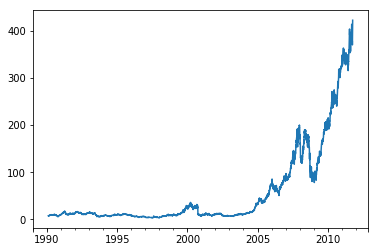

In [103]:
close_px['AAPL'].plot()

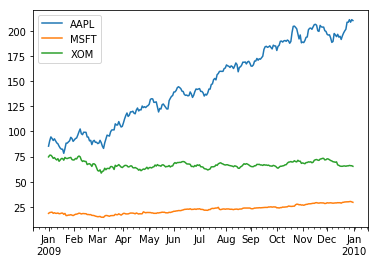

In [104]:
close_px.loc['2009'].plot()

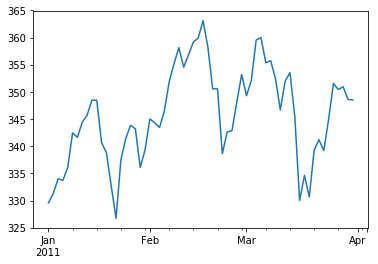

In [105]:
close_px['AAPL'].loc['01-2011': '03-2011'].plot()

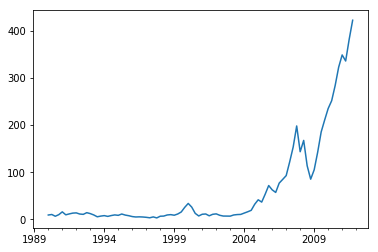

In [106]:
aapl_q = close_px['AAPL'].resample('Q-DEC').ffill()
aapl_q.plot()

## 移动窗口函数

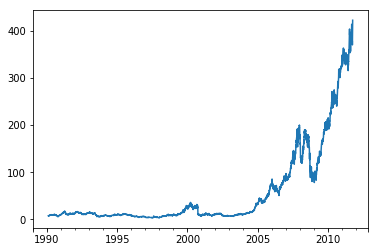

In [107]:
close_px.AAPL.plot()

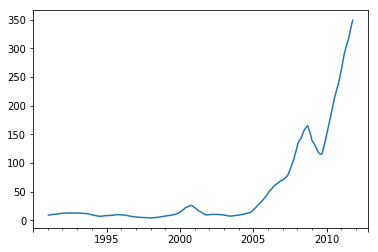

In [109]:
close_px.AAPL.rolling(250).mean().plot()

In [111]:
# 苹果公司股价的250日均线
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [112]:
aapl_std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
Freq: B, Name: AAPL, dtype: float64

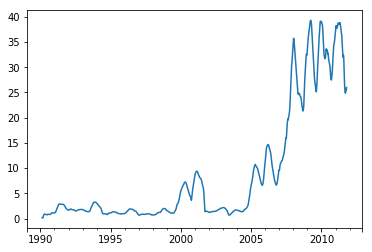

In [113]:
aapl_std250.plot()

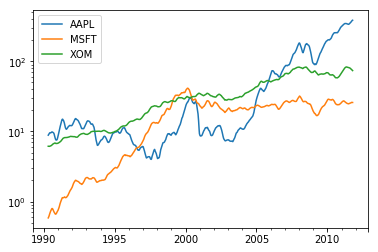

In [114]:
# 对数y轴
close_px.rolling(60).mean().plot(logy=True)

### 指数加权函数

Text(0.5,1,'Expotentially-weighted MA')

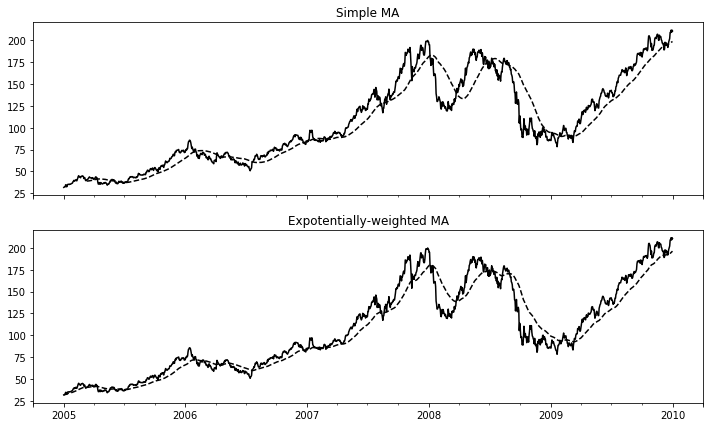

In [117]:
# 窗口：指的是使用固定大小的数据量（可以理解为可在时间轴上滑动固定长度的时间段）
# 指数加权：定义一个衰减因子常量使得近期观测值有更大的权数
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))
aapl_px = close_px.AAPL['2005': '2009']
ma60 = aapl_px.rolling(60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Expotentially-weighted MA')

### 二元移动窗口函数

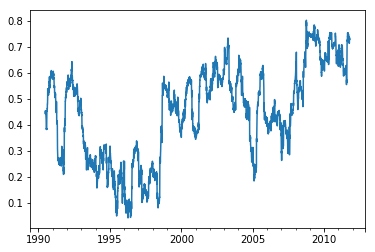

In [123]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

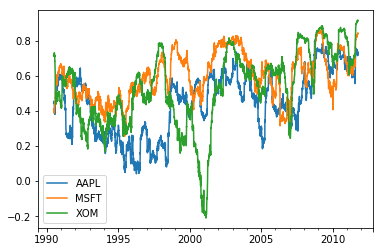

In [124]:
# 如果想一次性计算多只股票与标准普尔500指数的相关系数
# 可直接传入一个timeseries和DataFrame
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 用户定义的移动窗口函数

In [125]:
from scipy.stats import percentileofscore

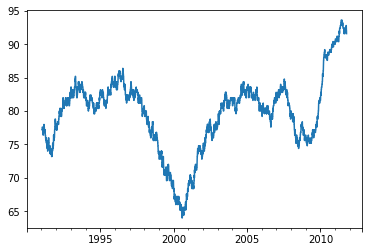

In [130]:
# AAPL 2%回报率的百分等级
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent, raw=True)
result.plot()

## 性能和内存使用方面的注意事项

In [131]:
# pandas对数据对齐和重采样运算进行了高度优化
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -1.433935
2000-01-01 00:00:00.010   -0.330353
2000-01-01 00:00:00.020   -1.119798
2000-01-01 00:00:00.030    1.667969
2000-01-01 00:00:00.040   -0.340226
2000-01-01 00:00:00.050    0.742232
2000-01-01 00:00:00.060    1.162518
2000-01-01 00:00:00.070    1.101499
2000-01-01 00:00:00.080   -0.235391
2000-01-01 00:00:00.090   -0.531169
2000-01-01 00:00:00.100    0.172825
2000-01-01 00:00:00.110   -1.271721
2000-01-01 00:00:00.120   -2.109239
2000-01-01 00:00:00.130    0.047791
2000-01-01 00:00:00.140    0.456663
2000-01-01 00:00:00.150    0.111724
2000-01-01 00:00:00.160    0.052498
2000-01-01 00:00:00.170    0.475759
2000-01-01 00:00:00.180   -0.550455
2000-01-01 00:00:00.190   -0.595356
2000-01-01 00:00:00.200   -0.122119
2000-01-01 00:00:00.210    0.494803
2000-01-01 00:00:00.220   -0.493263
2000-01-01 00:00:00.230   -0.231809
2000-01-01 00:00:00.240   -0.486111
2000-01-01 00:00:00.250    0.860030
2000-01-01 00:00:00.260    0.977830
2000-01-01 00:00:00.270   -0

In [132]:
%timeit ts.resample('15min').ohlc()

204 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [133]:
%timeit ts.resample('15s').ohlc()

204 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [134]:
# 对于规则频率之间的转换，pandas做了极大的优化
# 上述两个聚合结果耗费时间和频率基本“无关”